# Thématique 2 - Analyse bivariée de variables quantitatives

Réalisé par Alexandre Pauly.

### Importation des librairies

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data pre-processing

In [39]:
# Préparation du fichier de données
filepath = "../data"
filename = "Commandes.csv"
file = os.path.join(filepath, filename)

# Lecture des données
df = pd.read_csv(file, delimiter=";")

# Affichage des indicateurs de positions et de dispersions
df.describe()

,Prix,Vente
count,6.000000,6.000000
mean,193.833333,38.166667
std,87.064153,38.566393
min,95.000000,5.000000
25%,134.500000,9.000000
50%,179.000000,27.000000
75%,240.000000,54.000000
max,330.000000,104.000000


Ce jeu de données comptabilise le nombre de commandes en fonction du prix de vente. Ici nous comptons 6 commandes, soit 6 individus. Le prix minimal fixé est compris entre 95 et 330€ pour un nombre de commandes variant entre 5 et 104.

In [40]:
df.head()

,Prix,Vente
0,95,104
1,130,58
2,148,42
3,210,12
4,250,8


In [41]:
df.tail()

,Prix,Vente
1,130,58
2,148,42
3,210,12
4,250,8
5,330,5


In [42]:
df.shape

(6, 2)

On sait qu'il y a 6 variables à étudier.

In [43]:
df.dtypes

Prix     int64
Vente    int64
dtype: object

Dans cette étude, nous avons que des variables quantitatives.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Prix    6 non-null      int64
 1   Vente   6 non-null      int64
dtypes: int64(2)
memory usage: 224.0 bytes


In [45]:
df.columns

Index(['Prix', 'Vente'], dtype='object')

Explication des variables : 
- Prix : Prix de vente d'un produit
- Vente : Quantité de produits vendus à un prix donné

In [46]:
df.isnull().sum()

Prix     0
Vente    0
dtype: int64

Le jeu de données n'a pas l'air de présenter de données manquantes.

In [47]:
print(df)

   Prix  Vente
0    95    104
1   130     58
2   148     42
3   210     12
4   250      8
5   330      5


## Analyse statistique

### Nuage de points

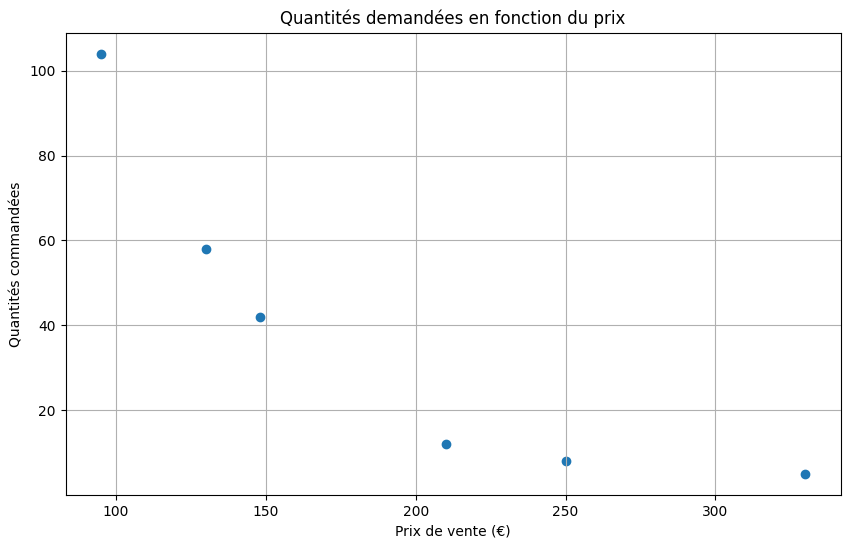

In [48]:
x = df['Prix']
y = df['Vente']

# Création du nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.title("Quantités demandées en fonction du prix")
plt.xlabel("Prix de vente (€)")
plt.ylabel("Quantités commandées")

plt.grid(True)
plt.show()

**Remarque** : La forme que prend ce nuage de points ressemble à une fonction logarithmique inverse.

### Coefficient de corrélation linéaire

In [49]:
correlation_matrix = x.corr(y)
print(correlation_matrix)

-0.8685478033269086


### Droite de régression

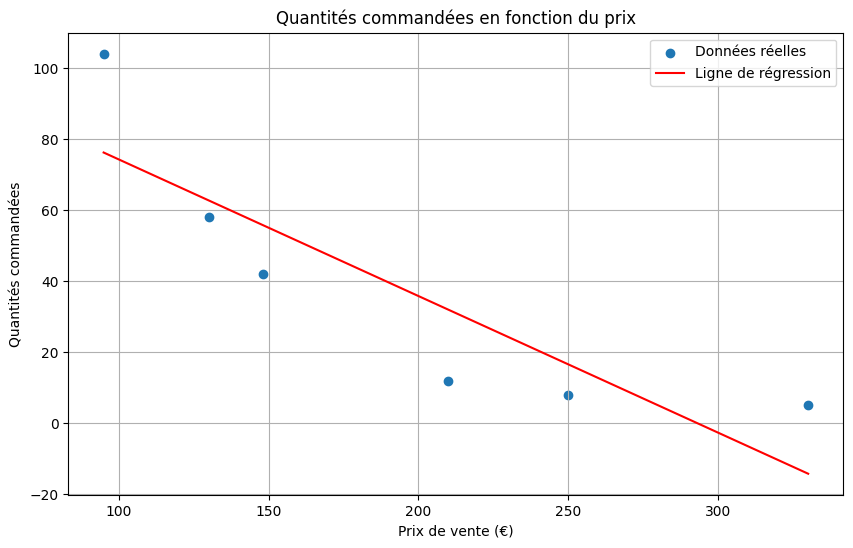

Coefficient de régression: -0.38473648336668065
Intercept: 112.74142169257493
R^2 score: 0.754375286663998


In [50]:
from sklearn.linear_model import LinearRegression

# Données
X = np.array(x).reshape(-1, 1)
y = np.array(y)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Affichage du graphique avec la ligne de régression
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Données réelles')
plt.plot(x, y_pred, color='red', label='Ligne de régression')
plt.xlabel("Prix de vente (€)")
plt.ylabel("Quantités commandées")
plt.title("Quantités commandées en fonction du prix")
plt.legend()
plt.grid(True)
plt.show()

# Coefficients
print(f"Coefficient de régression: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R^2 score: {model.score(X, y)}")

Le modèle n'est pas si mal ajusté sur ce jeu données. En soit, 75% de la variabilité des quantités commandées est expliquée par le modèle. Cependant, au vu de l'allure du jeu de données, on ne peut pas penser que davantage de données seraient correctement prédites par une droite de régression linéaire.

### Vérification des hypothèses sur les résidus

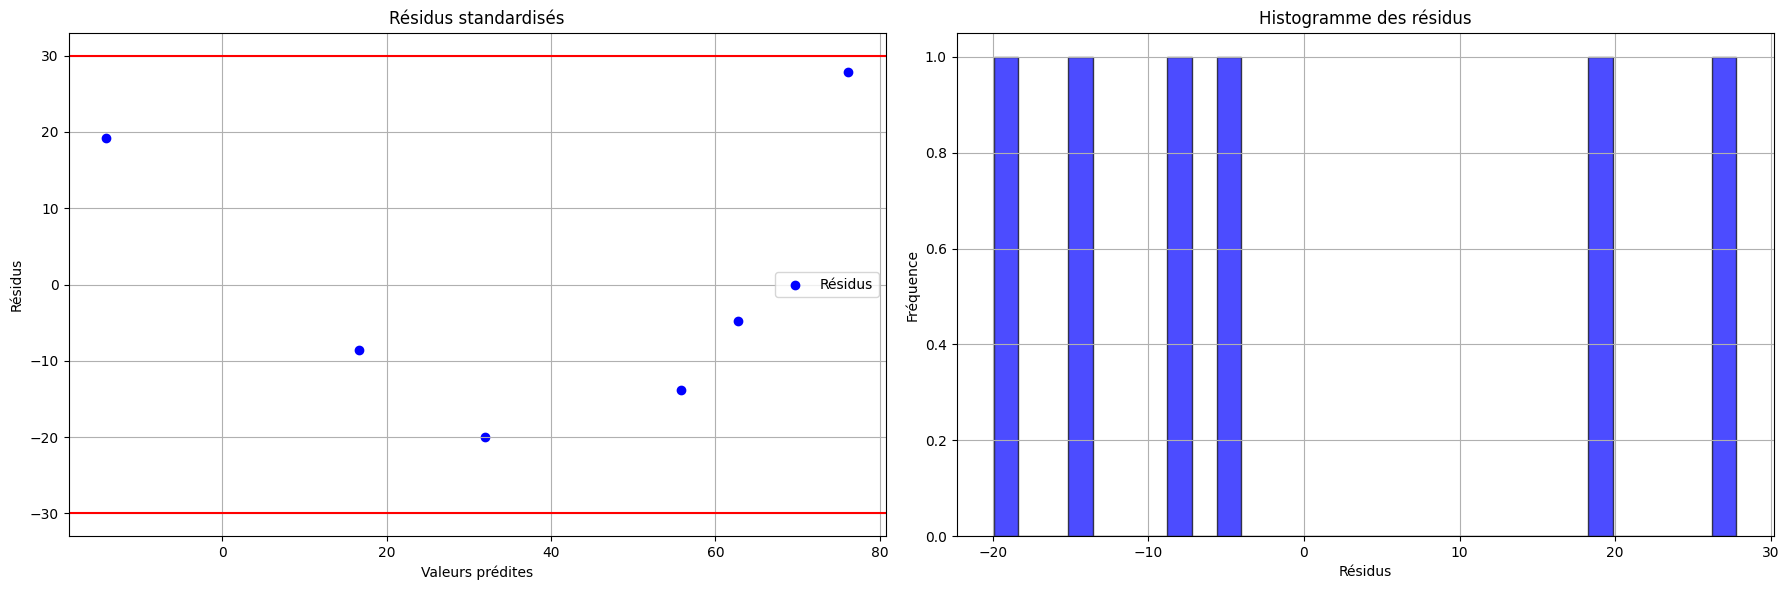

Statistique de Durbin-Watson: 1.138679757009326


In [51]:
# Calcul des résidus
residuals = y - y_pred

df['residuals'] = residuals

# Création de la figure avec 2 sous-graphiques (1 ligne, 2 colonnes)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Graphique des résidus
axs[0].scatter(y_pred, residuals, color='blue', label='Résidus')
axs[0].axhline(y=30, color='red', linestyle='-')
axs[0].axhline(y=-30, color='red', linestyle='-')
axs[0].set_xlabel("Valeurs prédites")
axs[0].set_ylabel("Résidus")
axs[0].set_title("Résidus standardisés")
axs[0].grid(True)
axs[0].legend()

import scipy.stats as stats

# Histogramme des résidus
axs[1].hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
axs[1].set_xlabel("Résidus")
axs[1].set_ylabel("Fréquence")
axs[1].set_title("Histogramme des résidus")
axs[1].grid(True)

# Ajustement de l'affichage pour éviter le chevauchement
plt.tight_layout()

# Affichage de la figure
plt.show()

from statsmodels.stats.stattools import durbin_watson

# Test de Durbin-Watson
dw_stat = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson: {dw_stat}")

Au vu de l'allure des résidus : forme quadratique, il reste de l’information dans les résidus. Malgré un pourcentage d’explication important, on ne peut pas valider le modèle

In [52]:
# Modification du format de y pour assurer la compatibilité
y = pd.Series(y, name="AnotherColumn")

u = np.log(x)
v = np.log(y)

correlation_matrix = u.corr(v)
print(correlation_matrix)

-0.9918848405004519


Le coefficient de corrélation est bien meilleur et est même très proche de 1, donc il va approcher bien plus fiablement le modèle des données. Il est négatif, ce qui veut dire que les données sont décroissantes, donc plus le prix augmente, moins il y aura de vente.

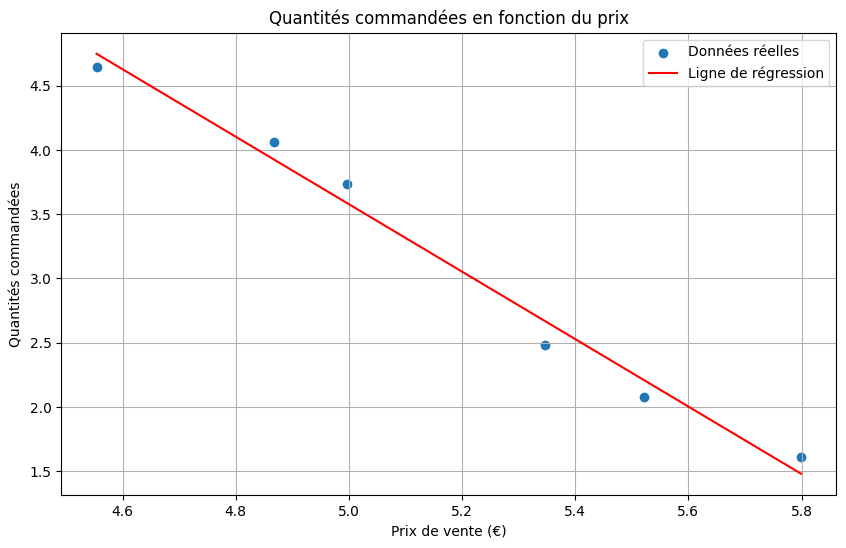

Coefficient de régression: -2.6242389163069166
Intercept: 16.699021292417296
R^2 score: 0.9838355368146063


In [53]:
# Données
U = np.array(u).reshape(-1, 1)
v = np.array(v)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(U, v)

# Prédictions
v_pred = model.predict(U)

# Affichage du graphique avec la ligne de régression
plt.figure(figsize=(10, 6))
plt.scatter(u, v, label='Données réelles')

plt.plot(u, v_pred, color='red', label='Ligne de régression')
plt.xlabel("Prix de vente (€)")
plt.ylabel("Quantités commandées")
plt.title("Quantités commandées en fonction du prix")
plt.legend()
plt.grid(True)
plt.show()

# Coefficients
print(f"Coefficient de régression: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R^2 score: {model.score(U, v)}")

Utiliser une fonction logarithmique sur les données aura permis de mieux les approcher. De ce fait, on constate une relation linéaire entre log(x) et log(y).

Maintenant, 98% de la variabilité des quantités commandées est expliquée par le modèle.

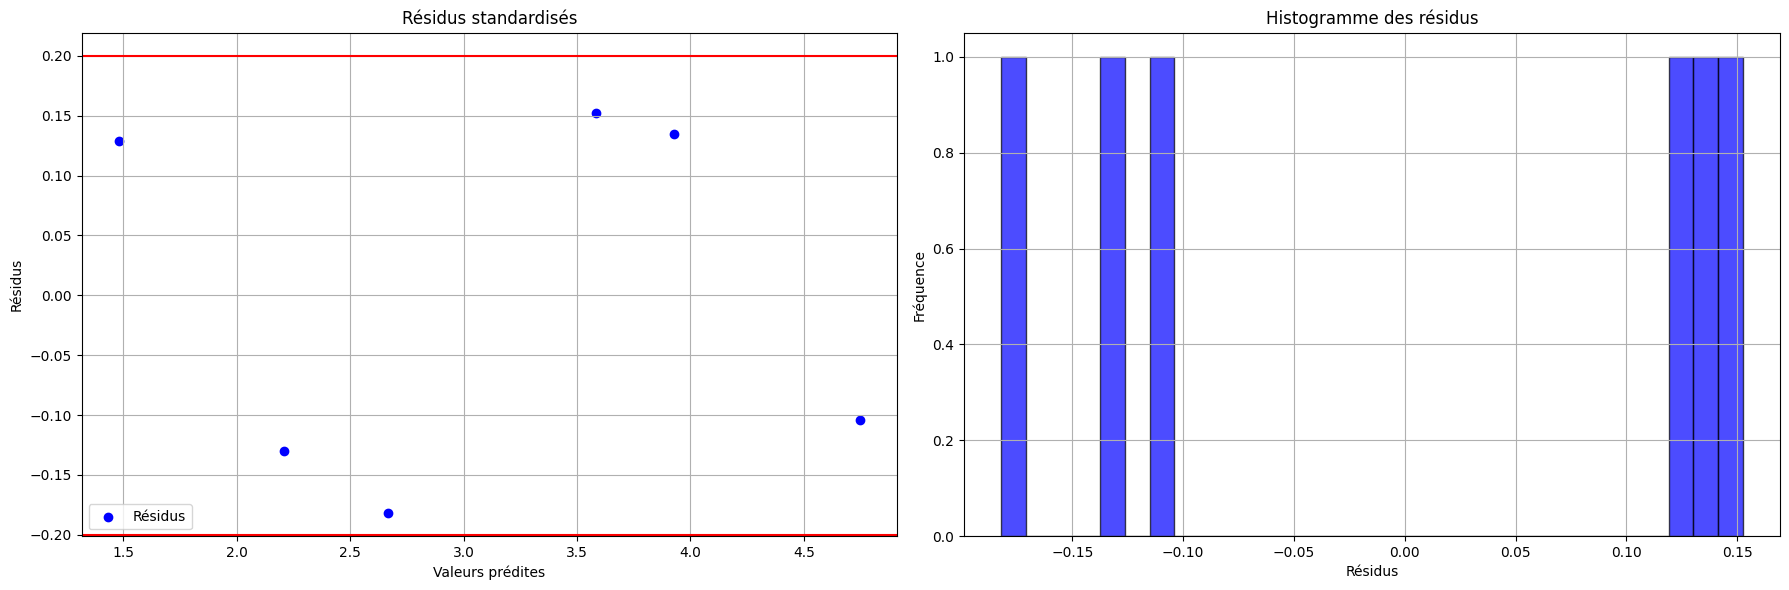

Statistique de Durbin-Watson: 2.0100710418389367


In [54]:
# Calcul des résidus
residuals = v - v_pred

df['residuals'] = residuals

# Création de la figure avec 2 sous-graphiques (1 ligne, 2 colonnes)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Graphique des résidus
axs[0].scatter(v_pred, residuals, color='blue', label='Résidus')
axs[0].axhline(y=0.2, color='red', linestyle='-')
axs[0].axhline(y=-0.2, color='red', linestyle='-')
axs[0].set_xlabel("Valeurs prédites")
axs[0].set_ylabel("Résidus")
axs[0].set_title("Résidus standardisés")
axs[0].grid(True)
axs[0].legend()

import scipy.stats as stats

# Histogramme des résidus
axs[1].hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
axs[1].set_xlabel("Résidus")
axs[1].set_ylabel("Fréquence")
axs[1].set_title("Histogramme des résidus")
axs[1].grid(True)

# Ajustement de l'affichage pour éviter le chevauchement
plt.tight_layout()

# Affichage de la figure
plt.show()

from statsmodels.stats.stattools import durbin_watson

# Test de Durbin-Watson
dw_stat = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson: {dw_stat}")

Les résidus sont centrés, sans forme particulière et compris entre -0.2 et 0.2.

### Prédiction

In [55]:
new_data = model.predict(np.array([[np.log(75)]]))

print(np.exp(new_data))

[214.62685543]


Pour un prix de vente fixé à 75€, la quantité commandée serait 214.

**Remarque** : Il est important de revenir à l'unité de base (avant transformation) pour faire des estimations si l'on veut pouvoir les comparer aux données de base.